In [4]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# reading data and manipulating

##### 1 - read data
##### 2 - detect which features we wanna work on 

In [2]:
data=pd.read_csv("data\\Housing.csv")

In [3]:
data=data[["area","bedrooms","bathrooms","stories","price"]]

#### normalizing input

In [4]:
normalized_input=(data.iloc[:,0:4]-data.iloc[:,0:4].min())/(data.iloc[:,0:4].max()-data.iloc[:,0:4].min())

#### adding ones for x0

In [5]:
normalized_input.insert(0,"ones",1)

# data info

In [6]:
data.describe()

,area,bedrooms,bathrooms,stories,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,1.330000e+07


<Axes: xlabel='area', ylabel='price'>

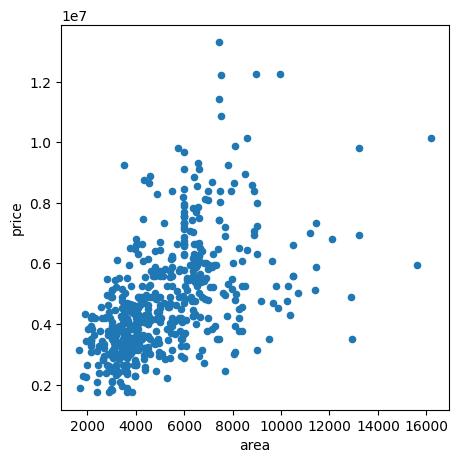

In [7]:
data.plot(kind="scatter",x="area",y="price",figsize=(5,5))

<Axes: xlabel='bedrooms', ylabel='price'>

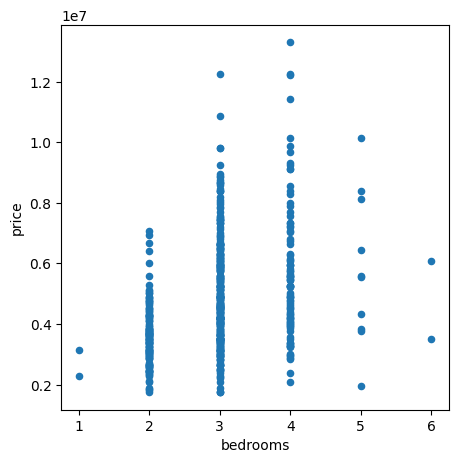

In [8]:
data.plot(kind="scatter",x="bedrooms",y="price",figsize=(5,5))

<Axes: xlabel='stories', ylabel='price'>

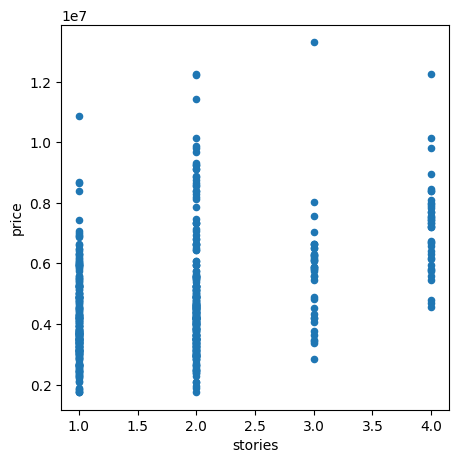

In [9]:
data.plot(kind="scatter",x="stories",y="price",figsize=(5,5))

# inputs & output and theta


##### transform data into * matricies * to work on and assume theta

In [10]:
input=np.matrix(normalized_input.values)

In [11]:
output=np.matrix(data["price"].values).T

In [12]:
theta=np.matrix(np.ones(normalized_input.shape[1]))

In [13]:
input.shape,output.shape,theta.shape

((545, 5), (545, 1), (1, 5))

# cost function

In [14]:
def cost(X,Y,theta):
    z= np.power(((X*theta.T)-Y),2)
    return np.sum(z)/(2*len(X))

In [15]:
cost(input,output,theta)

np.float64(13106906203751.934)

In [16]:
theta

matrix([[1., 1., 1., 1., 1.]])

# gradient decent

In [17]:
# GD function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    costt = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        costt[i] = cost(X, y, theta)
        
    return theta, cost


In [20]:
sollution,costt=gradientDescent(input,output,theta,.1,100000)

In [21]:
sollution


matrix([[2275019.99443686, 5529355.44595473,  991477.47023764,
         3600541.41982818, 1594785.02751793]])

In [22]:
data.head()

,area,bedrooms,bathrooms,stories,price
0,7420,4,2,3,13300000
1,8960,4,4,4,12250000
2,9960,3,2,2,12250000
3,7500,4,2,2,12215000
4,7420,4,1,2,11410000


In [23]:
data.iloc[1,0:4]

area         8960
bedrooms        4
bathrooms       4
stories         4
Name: 1, dtype: int64

In [24]:
normalized_input.iloc[0,1]


np.float64(0.3965635738831615)

In [34]:
sollution[0,0]+normalized_input.iloc[6,1]*sollution[0,1]+normalized_input.iloc[6,2]*sollution[0,2]+normalized_input.iloc[6,3]*sollution[0,3]+normalized_input.iloc[6,4]*sollution[0,4]

np.float64(9498621.745526895)

In [47]:
normalized_input.iloc[10,:]@sollution.T

array([7592488.14983357])

In [48]:
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(normalized_input,np.array(data["price"]).reshape(-1,1))

LinearRegression()

In [49]:
model.coef_

array([[      0.        , 5529355.44595452,  991477.47023754,
        3600541.41982833, 1594785.02751794]])

In [50]:
model.intercept_

array([2275019.99443693])

In [51]:
model.coef_[0,0]=model.intercept_

C:\Users\tharw\AppData\Local\Temp\ipykernel_15092\482555820.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model.coef_[0,0]=model.intercept_


In [52]:
model.coef_.shape

(1, 5)

In [54]:
normalized_input.iloc[10,:]@model.coef_.T

array([7592488.14983344])